Object-oriented Programming (5 Points)
1.	Use the techniques discussed in module 1 to revise the charge and make payment
methods of the CreditCard class to ensure that the caller sends a number
as a parameter.
a- If the parameter to the make payment method of the CreditCard class
were a negative number, that would have the effect of raising the balance
on the account. Revise the implementation so that it raises a ValueError if
a negative value is sent.
b- The CreditCard class provided in module 1 initializes the balance of a new account
to zero. Modify that class so that a new account can be given a
nonzero balance using an optional fifth parameter to the constructor. The
four-parameter constructor syntax should continue to produce an account
with zero balance.
c- Modify the declaration of the first for loop in the CreditCard tests, from
Code Fragment 2.3, so that it will eventually cause exactly one of the three
credit cards to go over its credit limit. Which credit card is it?


In [ ]:
# Copyright 2013, Michael H. Goldwasser
#
# Developed for use with the book:
#
#    Data Structures and Algorithms in Python
#    Michael T. Goodrich, Roberto Tamassia, and Michael H. Goldwasser
#    John Wiley & Sons, 2013
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

class CreditCard:
  """A consumer credit card."""
  
  def __init__(self, customer, bank, acnt, limit, balance=0): # added balance as another input and make default value 0.
    """Create a new credit card instance.

    The initial balance is zero.

    customer  the name of the customer (e.g., 'John Bowman')
    bank      the name of the bank (e.g., 'California Savings')
    acnt      the acount identifier (e.g., '5391 0375 9387 5309')
    limit     credit limit (measured in dollars)
    """
    self._customer = customer
    self._bank = bank
    self._account = acnt
    self._limit = limit
    self._balance = balance # initialized balance as the balance input.

  def get_customer(self):
    """Return name of the customer."""
    return self._customer
    
  def get_bank(self):
    """Return the bank's name."""
    return self._bank

  def get_account(self):
    """Return the card identifying number (typically stored as a string)."""
    return self._account

  def get_limit(self):
    """Return current credit limit."""
    return self._limit

  def get_balance(self):
    """Return current balance."""
    return self._balance

  def charge(self, price):
    """Charge given price to the card, assuming sufficient credit limit.

    Return True if charge was processed; False if charge was denied.
    """
    if not isinstance(price, (float, int)): # makes sure to check if the input is a float or int.
      raise TypeError('The price must be a float or an integer.') # raises type error if input is not a float or int.
    if price + self._balance > self._limit:  # if charge would exceed limit,
      return False                           # cannot accept charge
    else:
      self._balance += price
      return True

  def make_payment(self, amount):
    """Process customer payment that reduces balance."""
    if not isinstance(amount, (float, int)): # makes sure to check if the input is a float or int.
      raise TypeError('The amount must be a float or an integer.') # raises type error if input is not a float or int.
    elif amount < 0: # makes sure that the amount cannot be a negative number.
      raise ValueError('The amount must be greater than 0, it cannot be negative.') # raises a value error if the amount is negative.
    self._balance -= amount

if __name__ == '__main__':
  wallet = []
  wallet.append(CreditCard('John Bowman', 'California Savings',
                           '5391 0375 9387 5309', 2500) )
  wallet.append(CreditCard('John Bowman', 'California Federal',
                           '3485 0399 3395 1954', 3500) )
  wallet.append(CreditCard('John Bowman', 'California Finance',
                           '5391 0375 9387 5309', 5000) )

  for val in range(1, 100): # modified range to 1-100
    wallet[0].charge(val)
    wallet[1].charge(2*val)
    wallet[2].charge(3*val) # California Finance reached its limit first.

  for c in range(3):
    print('Customer =', wallet[c].get_customer())
    print('Bank =', wallet[c].get_bank())
    print('Account =', wallet[c].get_account())
    print('Limit =', wallet[c].get_limit())
    print('Balance =', wallet[c].get_balance())
    while wallet[c].get_balance() > 100:
      wallet[c].make_payment(100)
      print('New balance =', wallet[c].get_balance())
    print()


Customer = John Bowman
Bank = California Savings
Account = 5391 0375 9387 5309
Limit = 2500
Balance = 2485
New balance = 2385
New balance = 2285
New balance = 2185
New balance = 2085
New balance = 1985
New balance = 1885
New balance = 1785
New balance = 1685
New balance = 1585
New balance = 1485
New balance = 1385
New balance = 1285
New balance = 1185
New balance = 1085
New balance = 985
New balance = 885
New balance = 785
New balance = 685
New balance = 585
New balance = 485
New balance = 385
New balance = 285
New balance = 185
New balance = 85

Customer = John Bowman
Bank = California Federal
Account = 3485 0399 3395 1954
Limit = 3500
Balance = 3422
New balance = 3322
New balance = 3222
New balance = 3122
New balance = 3022
New balance = 2922
New balance = 2822
New balance = 2722
New balance = 2622
New balance = 2522
New balance = 2422
New balance = 2322
New balance = 2222
New balance = 2122
New balance = 2022
New balance = 1922
New balance = 1822
New balance = 1722
New balance = 162

2.	a. Write a Python class that extends the Progression class so that each value
in the progression is the absolute value of the difference between the previous
two values. You should include a constructor that accepts a pair of
numbers as the first two values, using 2 and 200 as the defaults.
b- Write a Python class that extends the Progression class so that each value
in the progression is the square root of the previous value. (Note that
you can no longer represent each value with an integer.) Your constructor
should accept an optional parameter specifying the start value, using
65,536 as a default.


In [ ]:
class Progression:
  """Iterator producing a generic progression.

  Default iterator produces the whole numbers 0, 1, 2, ...
  """

  def __init__(self, start=0):
    """Initialize current to the first value of the progression."""
    self._current = start

  def _advance(self):
    """Update self._current to a new value.

    This should be overridden by a subclass to customize progression.

    By convention, if current is set to None, this designates the
    end of a finite progression.
    """
    self._current += 1

  def __next__(self):
    """Return the next element, or else raise StopIteration error."""
    if self._current is None:    # our convention to end a progression
      raise StopIteration()
    else:
      answer = self._current     # record current value to return
      self._advance()            # advance to prepare for next time
      return answer              # return the answer

  def __iter__(self):
    """By convention, an iterator must return itself as an iterator."""
    return self                  

  def print_progression(self, n):
    """Print next n values of the progression."""
    print(' '.join(str(next(self)) for j in range(n)))

class AbsoluteDifference(Progression): # created absolute difference class that extends progression class
  
  def __init__(self, firstval=2,secondval=200): # set the default value for first and second to 2 and 200.
    super().__init__(firstval) # passes the first input in the progresssion class' constructor
    self.previousval = abs(secondval - firstval) # previous class is the absolute difference of second minus first.
  
  def _advance(self): # overides the progression class' advance method
    self.previousval, self._current = self._current, abs(self._current - self.previousval) # swaps the previous value and the current value and calculates the present current value and assigns in to current.

class SquareRoot(Progression): # created square root class that extends progression class
 
  def __init__(self, start=65536): # set the default start value to 65536
    super().__init__(start) #  passes the start input in the progresssion class' constructor

  def _advance(self): # overides the progression class' advance method
    self._current = self._current**0.5 # square roots the current value and assigns it to the present current value.



In [ ]:
test = AbsoluteDifference()
test.print_progression(100)

test2 = SquareRoot()
test2.print_progression(10)

2 196 194 2 192 190 2 188 186 2 184 182 2 180 178 2 176 174 2 172 170 2 168 166 2 164 162 2 160 158 2 156 154 2 152 150 2 148 146 2 144 142 2 140 138 2 136 134 2 132 130 2 128 126 2 124 122 2 120 118 2 116 114 2 112 110 2 108 106 2 104 102 2 100 98 2 96 94 2 92 90 2 88 86 2 84 82 2 80 78 2 76 74 2 72 70 2 68 66 2
65536 256.0 16.0 4.0 2.0 1.4142135623730951 1.189207115002721 1.0905077326652577 1.0442737824274138 1.0218971486541166


1.	Develop a non-recursive implementation of the version of power function provided in Module 2.
2.	Study the inputs and outputs of walk() function in os module of Python. Implement your own walk function that performs the same job as os.walk()


In [ ]:
def powertest(x,n): # just used to test to compare if my power function gives the same output
  return x**n

def power(x,n): # defined power function
    result = 1 # initialized result = 1
    for i in range(n): # made x multiply by itself n times
        result *= x # multiplied all the x, n times and multiplied it with result=1
    return result # returned result

print(power(2,64))
print(power(2,0))
print(powertest(2,64))
print(powertest(2,0))

18446744073709551616
1
18446744073709551616
1


In [ ]:
import os # imported os

def walk(location): # defined walk()
  folder = [] # created a folder list
  files = [] # created a file list
  paths = os.listdir(location) # listed the directories of the initial root location/path and initialized it to paths variable
  for i in paths: # iterated through the directory paths list
    if os.path.isdir(os.path.join(location,i)): # checked to see which items in the paths list are directories, if they are, joined the previous root with the new root
      folder.append(i) # appened new root into the folder list
    else:
      files.append(i) # appened non directory items into the files list.
  yield location,folder,files # yielded the root, folder list, and files list.
  for i in folder: # iterated through the folders with all the other directories
    new = os.path.join(location,i) # joined the old root and the new root to extend into the new root.
    for j in walk(new): # recursively call walk with the new root until there is nothing left in the folder list.
      yield j # yields the new root's location, folder, and files.

for root, dirs, files in walk('.'):
  print(f'root: {root}, directories: {dirs}, files: {files}')

#calculating the sizes and total size of the folders
def foldersize(location): # defined foldersize()
  total = 0 # set total to 0
  for root, dirs, files in walk(location): # iterated through the walk function above
    for i in files: # iterated through all the files
      path = os.path.join(root,i) # joined the file to the root to calculate the size of each file
      total += os.path.getsize(path) # added the size of each file in the folder to total
  return total # returned the total

for root, dirs, files in walk('.'):
  print(f'{root} is {foldersize(root)} Bytes')

root: ., directories: ['.config', 'sample_data'], files: []
root: ./.config, directories: ['logs', 'configurations'], files: ['config_sentinel', 'gce', '.last_update_check.json', 'active_config', '.last_opt_in_prompt.yaml', '.last_survey_prompt.yaml']
root: ./.config/logs, directories: ['2022.09.26'], files: []
root: ./.config/logs/2022.09.26, directories: [], files: ['13.44.51.979721.log', '13.44.20.618810.log', '13.45.15.211900.log', '13.43.53.411838.log', '13.45.16.034312.log', '13.44.43.065608.log']
root: ./.config/configurations, directories: [], files: ['config_default']
root: ./sample_data, directories: [], files: ['README.md', 'anscombe.json', 'california_housing_train.csv', 'mnist_train_small.csv', 'california_housing_test.csv', 'mnist_test.csv']
. is 56874340 Bytes
./.config is 50819 Bytes
./.config/logs is 50540 Bytes
./.config/logs/2022.09.26 is 50540 Bytes
./.config/configurations is 94 Bytes
./sample_data is 56823521 Bytes


1.	Given an n-element sequence S, Algorithm D calls Algorithm E on each
element S[i]. Algorithm E runs in O(i) time when it is called on element
S[i]. What is the worst-case running time of Algorithm D?
2.	Al and Bob are arguing about their algorithms. Al claims his O(nlog n)-
time method is always faster than Bob’s O(n2)-time method. To settle the
issue, they perform a set of experiments. To Al’s dismay, they find that if
n < 100, the O(n2)-time algorithm runs faster, and only when n ≥ 100 is
the O(nlog n)-time one better. Explain how this is possible.
3.	There is a well-known city (which will go nameless here) whose inhabitants
have the reputation of enjoying a meal only if that meal is the best
they have ever experienced in their life. Otherwise, they hate it. Assuming
meal quality is distributed uniformly across a person’s life, describe
the expected number of times inhabitants of this city are happy with their
meals?


1. The worst Case running time of algorithm D is O(n^2) because there is a nested for loop. Algorithm D calls on algorithm E on each item in S and algorithm E runs n times the items in S.

2. It is possible that the graphs of O(nlogn) and O(n^2) intersect at n = 100. When graphed O(n^2) is under O(nlogn) when n < 100 at n = 100 both graphs cross each other's paths and when n > 100 O(nlogn) is under the graph of O(n^2). Therefore, when there is more than 100 items O(nlogn) is faster and when there are less than 100 items O(n^2) is faster.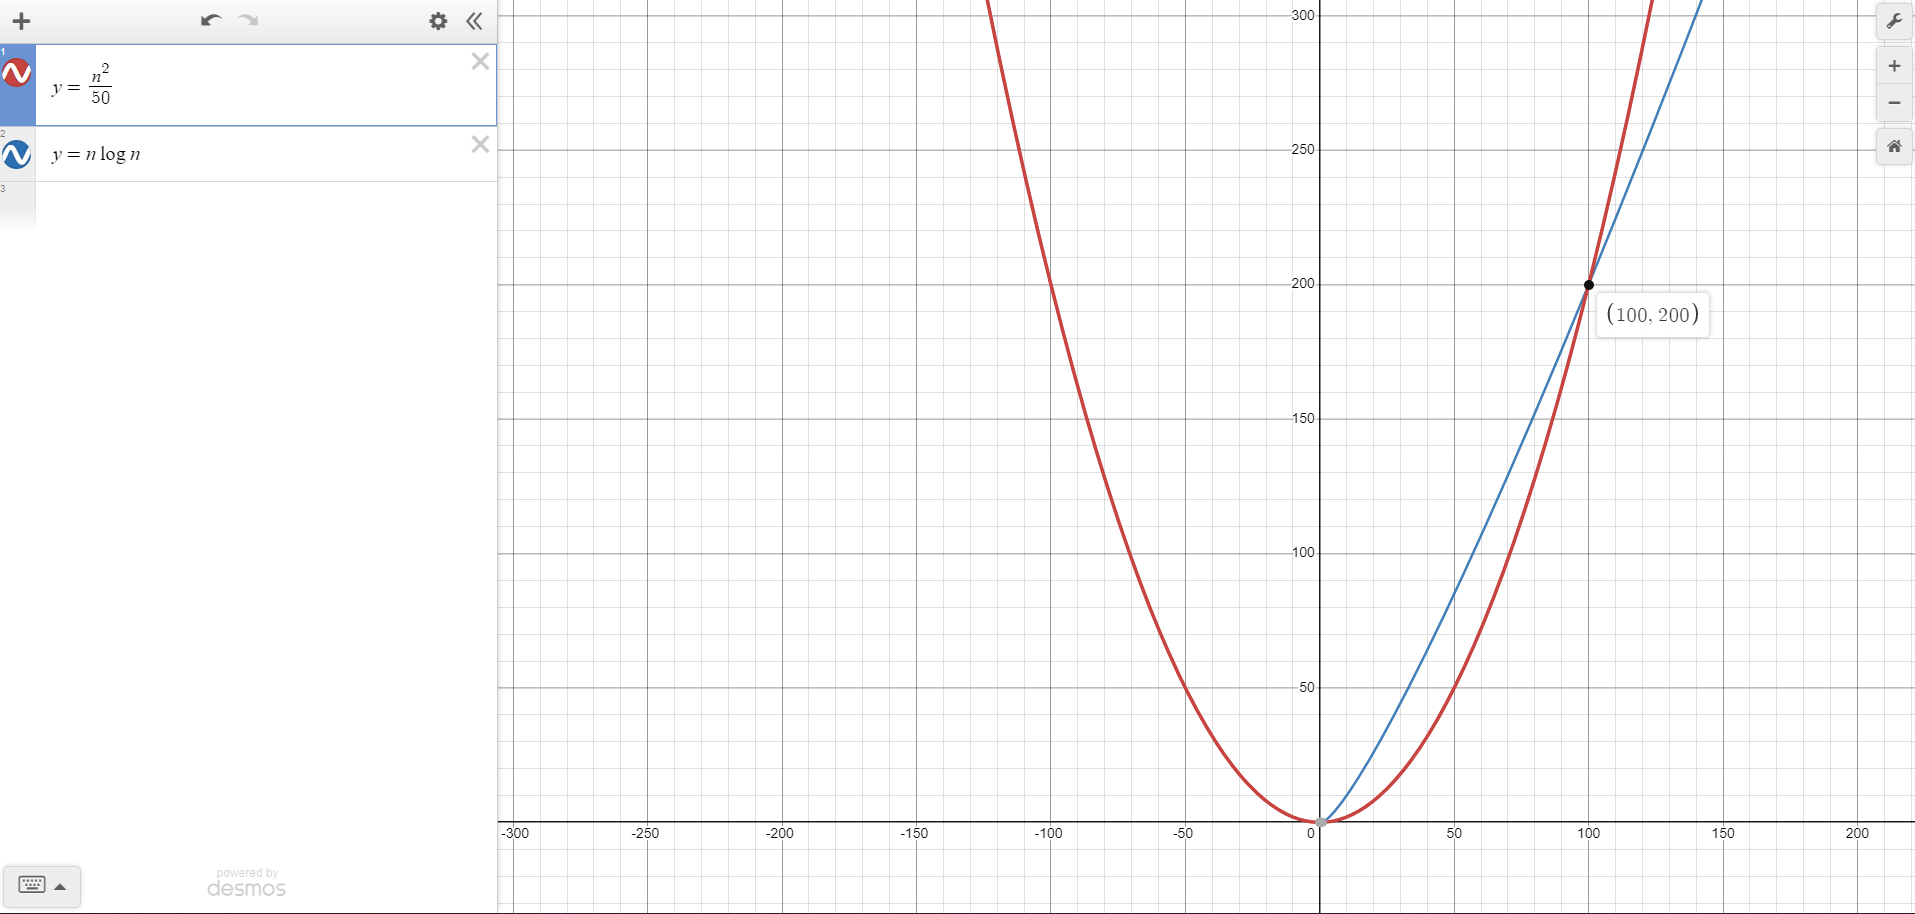

3. We can assume 1 = the meal is the best meal they've had in their life and 0 = not the best meal of their life. let L be a list of numbers in the range(0,1). At each index of the list will be the quality of the ith meal. The quality of the meal in each index would be 1/n. We can run a for loop on it and sum every index of the list.

In [ ]:
#Question 3

def expectednumber(N,n=1):
  total = 0  # set total variable to 0
  for i in range(n,N): # created a for loop to add the 1/i
    total += 1/i # summed the 1/i to the range of the loop
  return round(total) # rounded the total to a whole number and returned it

life_expectancy = 75
days_in_year = 365
meals_per_day = 3

test = life_expectancy * days_in_year * meals_per_day

print(expectednumber(test))

12


**References**

Goodrich, M., Tamassia, R., & Goldwasser, M. (2013). Data Structures and Algorithms in Python (2nd ed.). Wiley.

mjqxxxx. (2015, September 15). Expected happiness with meal quality. Mathematics Stack Exchange. Retrieved October 1, 2022, from https://math.stackexchange.com/questions/1436631/expected-happiness-with-meal-quality